# Lecture 9 - Observables


### Estimators definition
### Method of Moments
### Maximum Likelihood
### Least squares
### Extended Maximum Likelihood

In [ ]:
!pip install lmfit
!pip install gdown


In [ ]:
# import packages we will use
import random
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
import scipy.stats as stats
import math
import scipy.optimize as opt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import pylab as py
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.models import ExpressionModel
import gdown




# Estimator Definition

An estimator is a procedure applied to the data sample which gives a numerical value for a property of the parent population or a property/parameter of the parent distribution.
 Suppose that the quantity we want to measure is called $a$. $\hat{a}$ is an estimator.


Let's consider an estimator $\hat{a}$ to find the average height $a$ of all students of the University on the basis of a sample N.
Let's consider the different estimators


1. Add up all the heigths and divide by N
2. Add up the first 10 heights and divide by 10. Ignore the rest
3. Add up all the heigths and divide by N-1
4.  Trow away the data and give 1.8 as answer
5. Add up the second, fourth, sixth,... heights and divide by N/2 for N even and (N-1)/2 for N odd


# Consistent

Consistent: $\lim_{N\to\infty} \hat{a} = a$, that is you can get as close to the true value as you want, as long as you have a large enough data set.
In the previous example 1 is consistent:

\begin{equation}
\hat{\mu}=\frac{x_1...x_N}{N}=\bar{x}
\end{equation}

for $N$ going to infinity $\bar{x}\rightarrow\mu$: law of big numbers.
3 and 5 are also consistent since N-1 or N/2 make little difference when $N\rightarrow\infty$.
On the contrary 2 and 4 are not consistent.

# Unbiased

Unbiased: $\langle\hat{a}\rangle = a\ \forall\ N$, that is however large or small your data set may be, you should on average expect to get the right answer.
The expectation value of the estimator is equal to the true value.
For 1 we have

\begin{eqnarray}
\langle \hat{\mu} \rangle =\langle \frac{x_1\dots x_N}{N}\rangle =\frac{1}{N}\left( \langle x_1 \rangle +\cdots+ \langle x_N \rangle \right)=\frac{N \langle x \rangle }{N}=\mu
\end{eqnarray}


For 3 we have

\begin{eqnarray}
\langle \hat{\mu} \rangle =\langle \frac{x_1\dots x_N}{N-1}\rangle =\frac{1}{N-1}\left( \langle x_1 \rangle +\cdots+ \langle x_N \rangle \right)=\frac{N \langle x \rangle }{N-1}
\end{eqnarray}

so 3 is biased.



While for 5

\begin{eqnarray}
\langle \hat{\mu} \rangle =\langle \frac{x_2\dots x_N}{N/2}\rangle =\frac{1}{N/2}\left( \langle x_2 \rangle +\cdots+ \langle x_N \rangle \right)=\frac{N/2 \langle x \rangle }{N/2}=\mu
\end{eqnarray}

# Efficient

$V(\hat{a})$ is small, that is the fluctuations around the true value is for a given size of the data set smaller than for less efficient estimators.
In general if the variance is smaller we prefer the estimator, so the main difference between 1 and 5 is that 5 uses only half of the data set thus its variance is $\sqrt{2}$ larger.

# Example: Estimating the variance


We consider the ideal case where the true mean is known $\mu$. The estimator of the variance is thus

\begin{eqnarray*}
\widehat{V(x)} & = & \frac{1}{N}\sum_i \left(x_i-\mu\right)^2
\end{eqnarray*}


We can show that it is consistent and unbiased

\begin{eqnarray*}
\left\langle\widehat{V(x)}\right\rangle & = & \frac{1}{N}N\left\langle \left(x-\mu\right)^2 \right\rangle \\
		& = & \left\langle \left(x-\mu\right)^2 \right\rangle = V(x)
\end{eqnarray*}


Now let's consider the case where $\mu$ is not known.
An obvious remedy is to use $\bar{x}$ so that


\begin{eqnarray*}
\widehat{V(x)}	& = & \frac{1}{N}\sum_i \left(x_i-\hat{x}\right)^2
\end{eqnarray*}



We can prove that such an estimator is biased

\begin{eqnarray*}
\widehat{V(x)}	& = & \frac{1}{N}\sum_i \left(x_i-\overline{x}\right)^2= \frac{1}{N}\sum_i \left(x_i^2-2x_i\overline{x}+\overline{x}^2\right) \\
			& = & \frac{1}{N}\left(\sum_i x_i^2-2\overline{x}\sum_i x_i+\sum_i\overline{x}^2\right) \\
			& = & \frac{1}{N}\left(\sum_i x_i^2-2\sum_i\overline{x}^2+\sum_i\overline{x}^2\right) \\
			& = & \frac{1}{N}\sum_i\left( x_i^2-\overline{x}^2\right) \\
\end{eqnarray*}


We now take the expectation value of the estimator
\begin{eqnarray*}
\left\langle\widehat{V(x)}\right\rangle & = & \left\langle x^2 - \overline{x}^2 \right\rangle \\
		& = &  \left\langle x^2 \right\rangle - \left\langle\overline{x}^2 \right\rangle \\
		& = &  \left\langle x^2 \right\rangle - \left\langle x \right\rangle^2 + \left\langle \overline{x} \right\rangle^2 - \left\langle\overline{x}^2 \right\rangle\hspace{0.5cm} [\mathrm{CLT}] \\
\end{eqnarray*}

Where we used
\begin{eqnarray*}
\langle x \rangle =\langle \overline{x} \rangle
\end{eqnarray*}
thanks to the central limit theorem (CLT).


So we have

\begin{eqnarray*}
\left\langle\widehat{V(x)}\right\rangle 		& = & V(x) - V(\overline{x}) \\
		& = & V(x) - \frac{1}{N}V(x)\hspace{0.5cm} [\mathrm{CLT}] \\
		& = & \frac{N-1}{N}V(x)
\end{eqnarray*}


The bias fall as $1/N$ so for large data set this can be neglected.
A way to correct the bias is to defined

\begin{eqnarray*}
s^2 \equiv \widehat{V(x)} \equiv \frac{1}{N-1}\sum_i\left(x_i-\overline{x}\right)^2
\end{eqnarray*}

where the multiplication factor $\frac{N}{N-1}$ is known as Bessel's correction.

# Example

Let's consider the variance estimator to evaluate the variance of a given population.

We assume that the PDF governing the distribution of ages of York student is a Gaussian with a given mean and variance.

To estimate the mean and variance of the population we take samples of 5 students.
For each sample we calculate mean and variance.

In [ ]:
# Selected properties of the population M1-> Mean S1**2 is the variance
M1=25
S1=5

In [ ]:
random.seed(42)
students=5
sample=[]
for i in range(students):
    sample.append(random.gauss(M1, S1) )

sample=np.array(sample)
print(sample)

[24.27954835 24.135482   24.44342069 28.50991863 24.36205858]


In [ ]:
def variance1(array,m):
    som=0
    l=len(array)
    for i in range(l):
        som=som+(array[i]-m)**2/l

    return som


def variance2(array,m):
    som=0
    l=len(array)
    for i in range(l):
        som=som+(array[i]-m)**2/(l-1)

    return som

In [ ]:
av=sample.mean()

print("The mean of the sample is =", av)
print("The Variance (with bias) is=", variance1(sample,av))
print("The Variance (without bias) is=", variance2(sample,av))

The mean of the sample is = 25.146085649838863
The Variance (with bias) is= 2.839203080832994
The Variance (without bias) is= 3.5490038510412423


### How can we check if estimator is biased?
In order for an estimator to be unbiased, its expected value must exactly equal the value of the population parameter. The bias of an estimator is the difference between the expected value of the estimator and the actual parameter value. Thus, if this difference is non-zero, then the estimator has bias.


####   Monte Carlo (MC) simulation methods are commonly to test the performance of an estimator or its test statistic. The steps of MC are as follows:
##### 1 Use a data generating process, to replicate population estimator and its properties.
##### 2 Set the sample size of estimation, to generate sample estimators
##### 3 Set the number of simulations to generate several sample estimators
##### 4 Compare the properties of sample estimators with population values


Lets redo our previous example by repeating our previous test 10000 times. Each time we calculate the mean and variances (using both definitions we have seen).

In [ ]:
NNN=100000

ave=[]
var1=[]
var2=[]

for j in range(NNN):
    students=5
    sample=[]
    for i in range(students):
        sample.append(random.gauss(M1, S1) )

    sample=np.array(sample)
    av=sample.mean()
    ave.append(av)
    var1.append(variance1(sample,av))
    var2.append(variance2(sample,av))

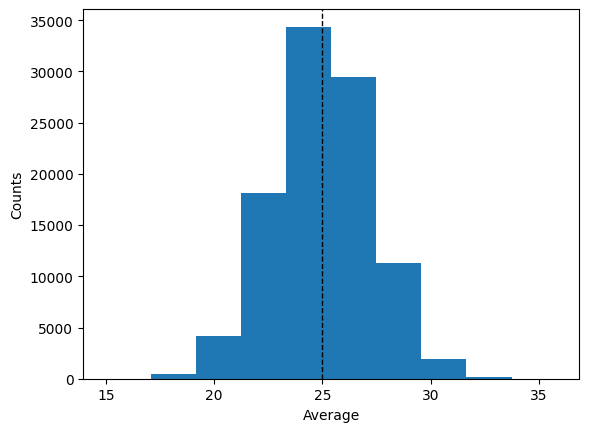

In [ ]:
# plotting a graph
plt.hist(ave)
plt.ylabel("Counts")
plt.axvline(M1, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Average")
plt.show()

The mean (as expected) works very well to estimate the 'mean' of the population.
what about the 2 definitions of variance?



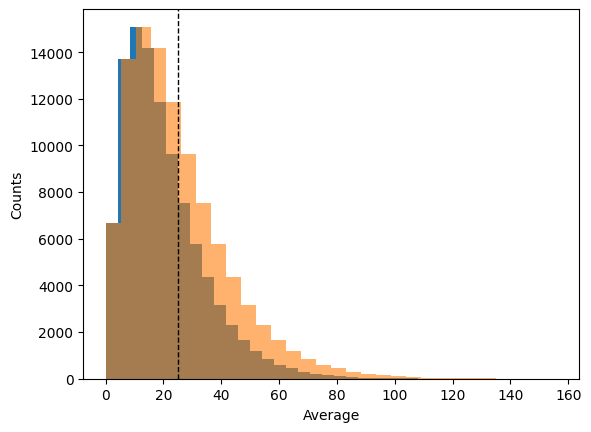

In [ ]:
plt.hist(var1,bins=30)
plt.hist(var2,bins=30,alpha=0.6)
plt.ylabel("Counts")
plt.axvline(S1**2, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Average")
plt.show()

In [ ]:
var1=np.array(var1)
var2=np.array(var2)

We see that the variance follows a $\chi^2$ distribution. We can calculate the average values of these 2 distributions

In [ ]:
print("The average value of the variance (biased)is ",var1.mean())
print("The average value of the variance (unbiased)is ",var2.mean())

The average value of the variance (biased)is  20.019319953863885
The average value of the variance (unbiased)is  25.024149942329853


### Monte Carlo techniques allow us to study in detail given estimators characteristics and evaluate whether they are consistent, biased, and efficient.  

# Method of Moments (MoM)


The method of moments involves equating sample moments with theoretical moments. So, let's start by making sure we recall the definitions of theoretical moments, as well as learn the definitions of sample moments.

### Definitions
#### Theoretical moment
Calculated from theoretical distributions

E($X^k$) is the $k^{th}$ (theoretical) moment of the distribution (about the origin), for $k=1,2,3...$. This is given by E($X^k$)=$\int_{-\infty}^\infty x^k f(x) dx$, where $f(x)$ is the probability density distribution of our population.


#### Sample moment
Calculated from sampled data

$M_k=\frac{1}{n}\sum_{i=1}^{n} x_i^k$ is the $k^{th}$ sample moment for $k=1,2,3...$


### One Form of the Method
The basic idea behind this form of the method is to:

1. Equate the first sample moment about the origin $M_1=\frac{1}{n}\sum_{i=1}^{n} X_i$
 to the first theoretical moment E($X$)

2. Equate the second sample moment about the origin $M_2=\frac{1}{n}\sum_{i=1}^{n} X_i^2$
 to the second theoretical moment E($X^2$)

3. Continue equating sample moments about the origin, $M_k=\frac{1}{n}\sum_{i=1}^{n} X_i^k$ with the corresponding theoretical moments E($X^k$) until you have as many equations as you have parameters.

4. Solve for the parameters.

The resulting values are called method of moments estimators. It seems reasonable that this method would provide good estimates, since the empirical distribution converges in some sense to the probability distribution. Therefore, the corresponding moments should be about equal.

### Example
Let $X_1, X_2, X_3... X_n$ be normal random variables with mean and variance. What are the method of moments estimators of the mean $\mu$ and variance $\sigma$?

 ### Solution
 Recall that $$E(X)=\int_{-\infty}^\infty X \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx=\mu$$
 and $$E(X^2)=\int_{-\infty}^\infty X^2 \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx=\sigma^2+\mu^2$$

from this we have $$M_1=\frac{1}{n}\sum_{i=1}^{n} X_i=E(X)=\mu$$ and $$M_2=\frac{1}{n}\sum_{i=1}^{n} X_i^2=E(X^2)=\sigma^2+\mu^2$$.

Solving form $\mu$ and $\sigma$ we get that

$$\mu=M_1=\frac{1}{n}\sum_{i=1}^{n} X_i$$ and
$$\sigma^2=M_2-M_1^2=\frac{1}{n}\sum_{i=1}^{n} X_i^2-\left(\frac{1}{n}\sum_{i=1}^{n} X_i\right)^2$$

which is the definition of Variance
$$\sigma^2=\frac{1}{n}\sum_{i=1}^{n} (X_i-\bar{X})^2$$

## Example 2:
The decay of a muon into a positron ($e^+$), an electron neutrino ($\nu_e$),
and a muon antineutrino ($\bar{\nu}_\mu$)
$$\mu^+\to e^+ +\nu_e+\bar{\nu}_\mu$$
has a distribution angle $t$ with density given by
$$f(t|\alpha) = \frac{1}{2\pi}(1 + \alpha \cos(t)),$$ where $-\pi<t<\pi$
with $t$ the angle between the positron trajectory and the $\mu^+$-spin. The anisometry parameter $\alpha \in [1/3, 1/3]$ depends the polarization of the muon beam and positron energy. Based on the measurement $t_1,...t_n$, give the method of
moments estimate $\hat{\alpha}$ for $\alpha$. (Note: In this case the mean is 0 for all values of $\alpha$, so we will have to compute the second moment to obtain an estimator.)

### Solution
The theoretical moment 1 is given by $$E(T)=\int_{-\pi}^{\pi}t\frac{1}{2\pi}(1 + \alpha cos(t)) dt=0,$$ so it doesnt provide any info.
The theoretical moment 2 is given by $$E(T^2)=\int_{-\pi}^{\pi}t^2\frac{1}{2\pi}(1 + \alpha cos(t)) dt=\frac{\pi^2}{3}-2\alpha.$$

Equating the second sample moment $M_2=\frac{1}{n}\sum_{i=1}^{n} t_i^2$ with the theoretical moment $E(T^2)$ and solving for $\alpha$ we get the MoM estimator $\hat{\alpha}$
$$\hat{\alpha}=\frac{1}{2}\left(M_2-\frac{\pi^2}{3}\right)$$


The method of moments is fairly simple and yields consistent estimators (under very weak assumptions), though these estimators are often biased.

It is an alternative to the method of maximum likelihood. Due to easy computability, method-of-moments estimates may be used as the first approximation to the solutions of the likelihood equations!


# Maximum Likelihood

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data.

This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

Let’s start with the Probability Density function (PDF) for the Normal distribution


\begin{equation}
P(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}


Let’s say we take one sample from a population that follows this distribuition and our sample is 5. What is the probability it comes from a distribution of μ = 5 and σ = 3?

In [ ]:
print('the probability is=',norm.pdf(5, 5, 3))

the probability is= 0.1329807601338109


What if it came from a distribution with μ = 7 and σ = 3?

In [ ]:
print('the probability is=',norm.pdf(5, 7, 3))

the probability is= 0.10648266850745075


Consider this sample: x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] and let’s compare these values to both PDF ~ N(5, 3) and PDF ~ N(7, 3). Our sample could be drawn from a variable that comes from these distributions, so let’s take a look.

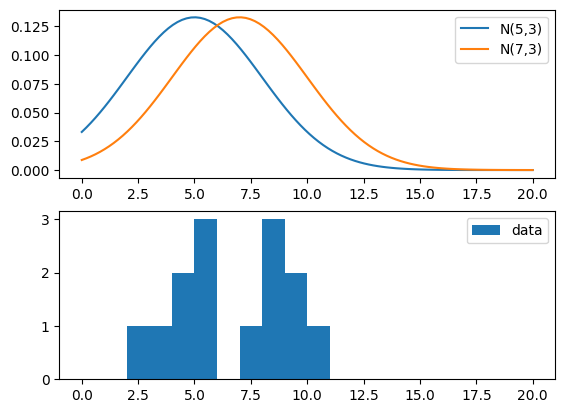

In [ ]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

x = np.linspace(0,20, 100)
plt.subplot(2, 1, 1)
plt.plot(x, stats.norm.pdf(x, 5, 3),label="N(5,3)")
plt.plot(x, stats.norm.pdf(x, 7, 3),label="N(7,3)")
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(data, bins=20, range=(0,20),label="data")
plt.legend()
plt.show()

Which is the value of $\mu$ and $\sigma$ that most likely give rise to our data?

# Definition

Given a data sample $X = \{x_1,x_2,\dots,x_N\}$ one applies an estimator $\hat{a}$ for the quantity $a$.
The data values $x_i$ are drawn from some probability density function $P(x,a)$ which depends on $a$. The form of $P$ is given and $a$ specified.
The probability of a data set is the product of the individual probabilities.


\begin{eqnarray*}
L(x_1,x_2,\dots,x_N;a)&=&P(x_1;a)P(x_2;a)\dots P(x_N;a)\\
&=&\Pi_i P(x_i;a)
\end{eqnarray*}

This product is called likelihood

The ML estimator for a parameter $a$ is  the procedure which evaluates the parameter value $\hat{a}$ which makes the actual observations $X$ as likely as possible, that is the set of parameters $\hat{a}$ which maximises $L(X;a)$. In practice, the logarithm of $L$  is more practical  to work with computationally (numerical stability):
\begin{eqnarray*}
\ln L(X;a)	& = & \ln \left( \prod_i P(x_i;a) \right) \\
		& = & \sum_i \ln P(x_i;a),
\end{eqnarray*}
The ML estimator $\hat{a}$ is then the value of $a$ which maximises $\ln L(X;a)$ (or minimises $-\ln L(X;a)$). This can be found (in some cases analytically) by:

\begin{eqnarray*}
\left.\frac{\mathrm{d}\,\ln L}{\mathrm{d}\,a}\right|_{a=\hat{a}}=0
\end{eqnarray*}

#### Why log? Simply because it helps with numerical stability, i.e. multiplying thousands of small values (probabilities, likelihoods, etc..) can cause an underflow in the system’s memory, and the log is a perfect solution because it transforms multiplications to additions and transforms small positive numbers into non-small negative numbers.

### We now apply the definition of log(L) to the previous example. For simplicity we assume that $\sigma=3$ is known.
We will see later on more complex examples

In [ ]:
data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

# Compare the likelihood of the random samples to the two
# distributions
def likelihood(mu,x):
    ll = 0
    sd=3
    for i in x:
        ll += np.log(norm.pdf(i, mu, sd))
    return ll


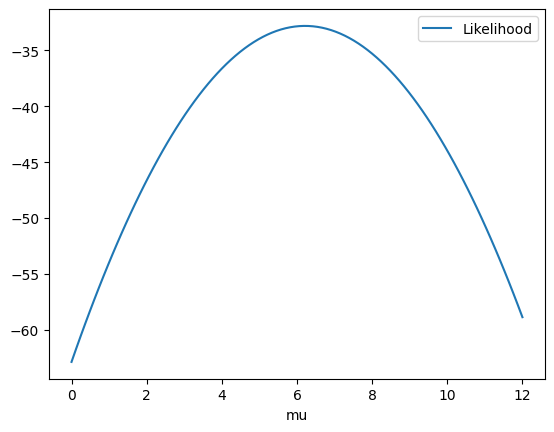

In [ ]:
mu = np.linspace(0,12, 100)
fun=likelihood( mu,data)

plt.plot(mu, fun,label="Likelihood")
plt.xlabel("mu")
plt.legend()
plt.show()

It is better to look for minima than for maxima so let's put a - to the likelihood



In [ ]:
data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

# Compare the likelihood of the random samples to the two
# distributions
def llog(mu,x):
    ll = 0
    sd=3
    for i in x:
        ll += -np.log(norm.pdf(i, mu, 3))
    return ll

So the routine found that the best value for mu is. actually 6.21 !!!

In [ ]:
opt.fmin(llog, 1, args=(data,))

Optimization terminated successfully.
         Current function value: 32.821108
         Iterations: 21
         Function evaluations: 42


array([6.21425781])

# (Even more) Examples

# Lifetime

For decays with a lifetime $\tau$, the (normalised) probability distribution as a function of time $t$ is: $P(t;\tau)=\frac{1}{\tau}\exp(-t/\tau)$. We calculate the function $\ln L$ for this distribution in analytic way

\begin{eqnarray*}
\ln L & = & \sum_i \ln\left(\frac{1}{\tau}\exp(-t_i/\tau)\right) \\
	& = & \sum_i \left( -\ln \tau - t_i/\tau \right) \\
\end{eqnarray*}


Differentiating with respect to $\tau$ and setting it to zero we obtain the estimator $\hat{\tau}$
The maximum can be found as:

\begin{equation}
\left.\frac{\mathrm{d}\,\ln L}{\mathrm{d}\,\tau}\right|_{\tau=\hat\tau} = 0 \Leftrightarrow \sum_i\left(t_i-\hat\tau\right) = 0 \Leftrightarrow \hat\tau = \frac{1}{N}\sum_i t_i
\end{equation}


# Discrete variable

Suppose that $X$ is a discrete random variable following the pdf


\begin{eqnarray}\label{pdf:ici}
P(X,\theta)=\left\{ \begin{array}{cc}
2\theta/3 & x=0\\
\theta/3 & x=1\\
2(1-\theta)/3 & x=2\\
(1-\theta)/3 & x=3
\end{array}\right.
\end{eqnarray}

where $0\le \theta \le1$.


First of all we check that the PDF is normalised

\begin{eqnarray}
\sum_i P(x_i)&=& 2\frac{\theta}{3}+\frac{\theta}{3}+\frac{2}{3}(1-\theta)+\frac{1}{3}(1-\theta)=1
\end{eqnarray}



Suppose we have the following sequence : $(3,0,2,1,3,2,1,0,2,1)$. What is the value of $\hat{\theta}$?


We calculate $\ln L$

\begin{eqnarray*}
\ln L&=& \sum_i \ln P\\
&=& \ln P(x=3)+ \ln P(x=0)+ \ln P(x=2)+ \ln P(x=1)+ \ln P(x=3)+ \ln P(x=2)\\
&&+ \ln P(x=1)+ \ln P(x=0)+ \ln P(x=2)+ \ln P(x=1)\\
\end{eqnarray*}


.... continue....
\begin{eqnarray*}
&=&2 \ln P(x=3)+3 \ln P(x=2)+3 \ln P(x=1)+2 \ln P(x=0)\\
&=&2\ln \left( \frac{2}{3}\theta\right)+3\ln \left( \frac{1}{3}\theta\right)+3\ln \left( \frac{2}{3}(1-\theta)\right)+2\ln \left( \frac{1}{3}(1-\theta)\right)\\
&=&2 \ln \frac{2}{3}+2 \ln \theta+3\ln \frac{1}{3}+3\ln \theta\\
&&+3\ln \frac{2}{3}+3\ln(1-\theta)+2\ln\frac{1}{3}+2\ln(1-\theta)
\end{eqnarray*}

We need to calculate $\frac{d \ln L}{d\theta}=0$ so all terms nodepending on $\theta$ can be neglected.

\begin{eqnarray}
\frac{d \ln L}{d\theta}=5\frac{1}{\theta}-\frac{5}{1-\theta}=0\\
1-\theta -\theta=0\\
\theta=1/2
\end{eqnarray}

# Multiple dimensions

Let's go back to the example involving the Gaussian PDF


\begin{equation}
P(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

Now assume that we want to esimtate both $\mu$ and $\sigma$ from a given data-set


In [ ]:
# Same data as before

data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

We define the loglikelihood function (with the - sign!)


In [ ]:
def llog2(mu,sigma,x):
    ll = 0
    sd=sigma
    for i in x:
        ll += -np.log(norm.pdf(i, mu, sd))
    return ll

In [ ]:
mu = np.linspace(1,10, 100)
sigma = np.linspace(1,4, 100)

X, Y = np.meshgrid(mu, sigma)
Z = llog2(X,Y,data)

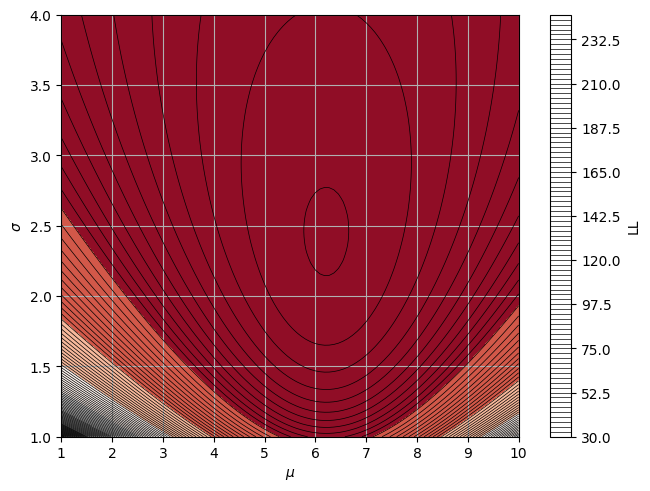

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Z.min(), Z.max())
cmap = plt.get_cmap('RdGy')
normB = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(X,Y, Z,cmap=cmap,norm=normB)
CS = plt.contour(X,Y,Z,100,linewidths=0.5,colors='k')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('LL')

plt.ylabel('$\sigma$')
plt.xlabel('$\mu$')
ax.grid()
plt.show()

In [ ]:
def llog3(params):
    ll = 0
    a, b= params
    data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
    for i in data:
        ll += -np.log(norm.pdf(i, a, b))
    return ll


In [ ]:
x0=[6,3]

res=opt.minimize(llog3,x0)
print(res.x)

[6.21428525 2.42541826]


# Properties of the ML estimator

#### So how good are ML estimators?

#### 1. Consistency: Usually, ML estimators are consistent. That is for increasing data sets, the estimator approaches the true value of the parameter.

#### 2. Efficiency





#### No such thing as a generally efficent estimator. Efficiency depends on the case considered.
### Limit of Accuracy: Minimum Variance Bound (MVB)
\begin{equation}
V(\hat{a})\ge\frac{-1}{d^2 \log{L}/da^2}
\end{equation}
#### For efficient estimators $V(\hat{a})=MVB$

#### For a Gaussian distribution:
\begin{equation}
LL=-\sum\frac{(x_i-\mu)^2}{2\sigma^2}-N\ln{\sigma\sqrt{2\pi}}
\end{equation}
#### What is the MVB?

The MVB for $\mu$ is given by $$V(\hat{\mu})=\frac{-1}{d^2\log L/d\mu^2}$$. The first derivative of $LL$ with respct to $\mu$ is just $$\frac{d LL}{d\mu}=\sum\frac{(x_i-\mu)}{\sigma^2},$$ and the second derivative $$\frac{d^2LL}{d\mu^2}=-\sum\frac{1}{\sigma^2}=-\frac{N}{\sigma^2}$$. From this the standard error for the ML estimator of $\mu$ is $$\sigma_\mu=\sqrt(V(\hat{\mu}))=\frac{\sigma}{\sqrt{N}}$$

#### 3. Biaseness: However, the ML estimator is often biased. This can be seen by calculating the likelihood function for a data set $\{x_i\}$ with a common mean $\mu$ and uncertainty $\sigma$:

\begin{equation}
P(x_i;\mu,\sigma_i) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
\end{equation}

and find the maximum, where the partial derivatives are zero:


\begin{equation}
\frac{\partial\,\ln L}{\partial\,\mu} = 0\ \frac{\partial\,\ln L}{\partial\,\sigma} = 0
\end{equation}

The ML estimator for the spread of a gaussian data set is $\hat\sigma^2 = \frac{1}{N}\sum_i(x_i-\hat{\mu})^2$ which as we know is biased (does not include Bessel's correction).


# Uncertainty on ML estimators

The uncertainty on a ML estimator can be found as discussed in relation to the efficiency:

\begin{eqnarray*}
\widehat{\sigma}_{\hat{a}}^2 = V(\hat{a}) = \mathrm{MVB} =  \frac{-1}{\left\langle \left(\frac{\mathrm{d}^2\,\ln L}{\mathrm{d}a^2}\right) \right\rangle}
\end{eqnarray*}

for unbiased, efficient, ML estimators.

<img src="http://drive.google.com/uc?export=view&id=1h8bDJv5mkdC8DrzxzUbrh9wU3N_Ajopc" style="width:450px; transform: rotate(0deg)" >

For several variables ($N$), the vector of estimated parameters $\widehat{\vec{a}}$ is found by minimising the $N$-dimensional function  $-\ln\,L$. The inverse of the covariance matrix is then given by:

    
$\mathrm{cov}^{-1}(a_i,a_j) = -\left.\frac{\partial^2\,\ln\,L}{\partial\,a_i\partial\,a_j}\right|_{\vec{a}=\widehat{\vec{a}}}$

Inverse of the Hessian matrix (https://en.wikipedia.org/wiki/Hessian_matrix)



There is some intuition in the plot above. The precision of the
estimate $\hat{a}$ can be measured by the curvature of the $\ln L(a)$ function
around its peak.

 The easy way to think about this is to recognize
that the curvature of the likelihood function tells us how certain we are about our estimate of our
parameters. A flatter curve has more uncertainty. The second derivative of the likelihood function is a measure of the
likelihood function’s curvature - this is why it provides our estimate of the uncertainty with which
we have estimated our parameters.

### Show that the uncertainty of the estimator of $\mu$ in the example above can be obtained by taking the difference between $\hat{\mu}-\mu_1$, where $\mu_1$ is the value of the parameter at the point where the log likelihood differs by 0.5 from its maximum point. $\hat{\mu}$ is the value of $\mu$ that maximises the log likelyhood.

### Solution:
$$LL(\hat{\mu})-LL(\mu_1)=0.5.$$
For the Gaussian PDF we have shown before that $LL(\mu)=-\sum\frac{(x_i-\mu)^2}{2\sigma^2}-N\ln{\sigma\sqrt{2\pi}}$. From this, we get that
$$LL(\hat{\mu})-LL(\mu_1)=-\sum\frac{(x_i-\hat{\mu})^2}{2\sigma^2}+\sum\frac{(x_i-\mu_1)^2}{2\sigma^2}=0.5.$$ This can be rewritten as
$$\sum(x_i-\mu_1)^2-\sum(x_i-\hat{\mu})^2=\sigma^2.$$
$$\sum(x_i^2+\mu_1^2-2x_i\mu_1-x_i^2-\hat{\mu}^2+2x_i\hat{\mu})=\sigma^2.$$ Using the fact that $\sum(x_i)=N\hat{\mu}$, we get
$$N \mu_1^2 -2 \mu_1 \hat{\mu}-N\hat{\mu}^2+2N\hat{\mu} \hat{\mu}=\sigma^2\\=N(\mu_1^2+\hat{\mu}^2-2 \mu_1 \hat{\mu})=\sigma^2\\=N(\hat{\mu}-\mu_1)^2=\sigma^2.$$ Therefore
$$\hat{\mu}-\mu_1=\frac{\sigma}{\sqrt{N}},$$ which is consistend with the MVB.

#### MLE provides us with efficient and unbiased estimation when N is large. There is no loss of information through binning as all experimental information is used. It provides errors on its estimates. At small N, however, estimators CAN be biased. You need to make assumptions about the parent PDF and there is no way of estimating a "Goodness of fit"

# Fitting data -- Method of least squares

# Introduction

For a function $f(x_i;a)$ and a data set $\{x_i,y_i,\sigma_i\}$, assuming for each data point $y_i$ is drawn from a Gaussian distribution of mean $f(x_i;a)$ and spread $\sigma_i$, we know that the likelihood function must obey:
\begin{eqnarray*}
\ln L 	& = & \sum_i \ln \left( \frac{1}{\sigma_i\sqrt{2\pi}}\exp\left(-\frac{\left(y_i-f(x_i;a)\right)^2}{2\sigma_i^2}\right)\right)\\
		& = & -\sum_i \ln \left(\sigma_i\sqrt{2\pi}\right) -\sum_i \frac{\left(y_i-f(x_i;a)\right)^2}{2\sigma_i^2}\\
\end{eqnarray*}

The first part does not depent on our parameters.

Instead of minimising $-\ln L$ we may therefore equivalently define and minimise:
\begin{eqnarray}\label{eq:chi2}
\chi^2 & \equiv & \sum_i \frac{\left(y_i-f(x_i;a)\right)^2}{\sigma_i^2}
\end{eqnarray}
I.e.$\chi$-squared minimisation, as you know it, is in fact the maximum-likelihood estimator of the function parameters $a$

This means that it comes with the nice properties of the ML estimator:

    
1. It is consistent (at least typically).
2. The bias is most often small.
3. It is efficient asymptotically ($N\to\infty$), and $\pm1\sigma$ can be found by identifying where $\chi^2$ changes by 1 from it's minimum:

\begin{eqnarray*}
V\left(\hat{a}\right) = -\frac{1}{\frac{\partial^2\ln L}{\partial a^2}} = \frac{2}{\frac{\partial^2\chi^2}{\partial a^2}}
\end{eqnarray*}

# $\chi^2$ PDF

The $\chi^2$ is a statistical distribution which is built as a sum of squares of $k$-gaussian (random) variables

\begin{eqnarray}
 \chi^2 =\sum_{i=1}^k z_i^2
\end{eqnarray}



#### Chi-square ($\chi^2$) distributions are a family of continuous probability distributions. They’re widely used in hypothesis tests, including the chi-square goodness of fit test and the chi-square test of independence.

#### The shape of a chi-square distribution is determined by the parameter k, which represents the degrees of freedom.

#### Very few real-world observations follow a chi-square distribution. The main purpose of chi-square distributions is hypothesis testing, not describing real-world distributions.


The corresponding PDF for the case of a continuous variable can be expressed as

\begin{eqnarray}
\chi^2=\frac{1}{2^{k/2}\Gamma \left( \frac{k}{2}\right)}e^{-x/2}x^{k/2-1}
\end{eqnarray}

We can calculate the mean $\mu$ and the variance $V$ and we get

\begin{eqnarray}
\mu=k\\
V=2k
\end{eqnarray}


In [ ]:
#------------------------------------------------------------
# Define the distribution parameters to be plotted
# We define 4 distributions with 4 different means
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)
#------------------------------------------------------------


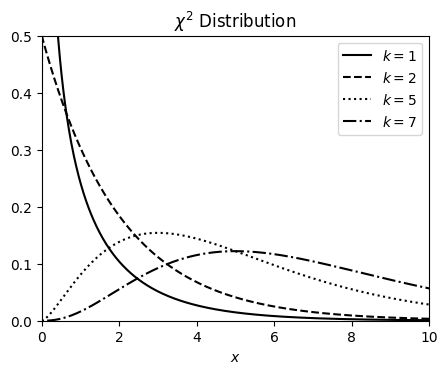

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3.75))
fig.subplots_adjust(bottom=0.12)
for k, ls in zip(k_values, linestyles):
    dist = chi2(k)
    res=plt.plot(x, dist.pdf(x), ls=ls, c='black',label=r'$k=%i$' % k)
plt.xlim(0, 10)
plt.ylim(0, 0.5)
plt.xlabel('$x$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.legend()
plt.show()

# Linear least squares

# Example:Fitting a straight line

For a straight line fit to a data set $\{x_i,y_i\}$ with common uncertainty $\sigma$ we have $f(x_i;m,c)=m\cdot x_i + c$, and:
\begin{eqnarray*}
\chi^2 & = & \sum_i \frac{\left(y_i-f(x_i;\vec{a})\right)^2}{\sigma^2} = \sum_i \frac{\left(y_i-mx_i-c\right)^2}{\sigma^2}
\end{eqnarray*}


We now differentiate and equate to zero as
\begin{eqnarray*}
\left.\frac{\partial \chi^2}{\partial c}\right|_{m=\widehat{m},c=\widehat{c}} & = & \frac{1}{\sigma^2}\sum_i -2\left(y_i - \widehat{m}x_i -\widehat{c}\right) = 0 \\
&\Rightarrow& \\
0 & = & \overline{y} - \widehat{m}\overline{x} -\widehat{c}
\end{eqnarray*}
and
\begin{eqnarray*}
\left.\frac{\partial \chi^2}{\partial m}\right|_{m=\widehat{m},c=\widehat{c}} & = & \frac{1}{\sigma^2}\sum_i -2\left(y_i - \widehat{m}x_i -\widehat{c}\right)x_i = 0 \\
&\Rightarrow& \\
0 & = & \overline{xy} - \widehat{m}\overline{x^2} -\widehat{c}\overline{x}\\
\end{eqnarray*}


Resolving the 2 equations we get

\begin{eqnarray}
\hat{m}&=&\frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{x}^2}=\frac{cov(x,y)}{V(x)}\\
\hat{c}&=&\bar{y}-\hat{m}\bar{x}
\end{eqnarray}
We thereby have established that $\widehat{m}$ and $\widehat{c}$ are linear in $y_i$

Covariance is a measure of the relationship between two random variables. The metric evaluates how much – to what extent – the variables change together (but not the strength of the relationship).

In [ ]:
#Select a random seed so we can all generate the same sample
np.random.seed(123)

Text(0, 0.5, 'y')

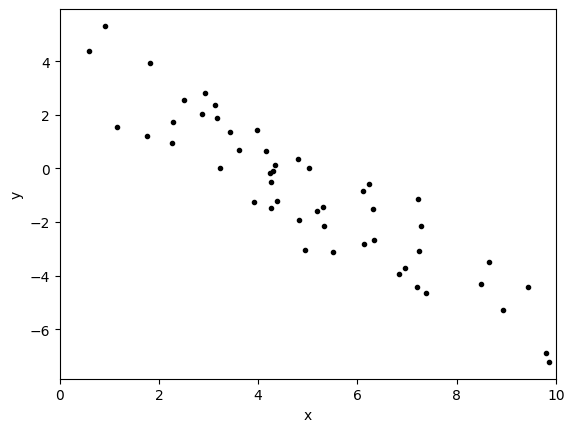

In [ ]:
# Choose the "true" parameters.
m_true = -1
c_true = 4

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
y = m_true * x + c_true
y += np.random.randn(N)
plt.errorbar(x, y, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

We apply the formulas:

In [ ]:
xave=x.mean()
yave=y.mean()
cov=np.cov(x,y)[0][1]
var=np.cov(x,y)[0][0]

mfit=cov/var
cfit=yave-mfit*xave

print("Least-squares estimates:")
print("m = ",mfit)
print("c = ",cfit)

Least-squares estimates:
m =  -1.090298332414615
c =  4.5584490943071385


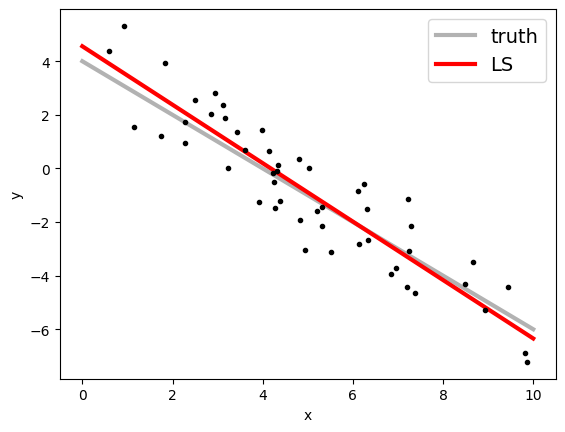

In [ ]:
plt.errorbar(x, y, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + c_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, mfit * x0 + cfit, "r", lw=3, label="LS")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=14)
plt.show()
#plt.xlim(0, 10)


# Uncertainties and covariances for straight-line fit

We can now calculate the errors on previous quantities by acting with derivatives over the ML.

\begin{eqnarray}
cov^{-1}(a_i,a_j)=\left. \frac{1}{2}\frac{\partial^2 \chi^2}{\partial a_i \partial a_j }\right|_{\vec{a}=\hat{a}}
\end{eqnarray}


\begin{eqnarray*}
\frac{1}{2}\left.\frac{\partial^2 \chi^2}{\partial c^2}\right|_{m=\widehat{m},c=\widehat{c}}
   & = & \frac{1}{\sigma^2}\sum_i 1 = \frac{N}{\sigma^2}\\
\frac{1}{2}\left.\frac{\partial^2 \chi^2}{\partial m \partial c}\right|_{m=\widehat{m},c=\widehat{c}}
   & = & \frac{1}{\sigma^2}\sum_i x_i = \frac{N}{\sigma^2}\overline{x}\\
\frac{1}{2}\left.\frac{\partial^2 \chi^2}{\partial m^2}\right|_{m=\widehat{m},c=\widehat{c}}
   & = & \frac{1}{\sigma^2}\sum_i x_i^2 = \frac{N}{\sigma^2}\overline{x^2}.
\end{eqnarray*}


We therefore get the inverse of the covariance matrix for $(m,c)$ to be:
\begin{eqnarray*}
\left(V_{cm}\right)^{-1} &=&
\frac{N}{\sigma^2} \left(
\begin{array}{ccc}
\overline{x^2} & \overline{x} \\[0.2cm]
\overline{x} & 1  \\[0.2cm]
\end{array}
\right).
\end{eqnarray*}


By inverting the matrix we get

\begin{eqnarray*}
V_{cm} &=&
\frac{\sigma^2}{N\cdot \left(\overline{x^2} - \overline{x}^2\right)} \left(
\begin{array}{ccc}
1 & -\overline{x} \\[0.2cm]
-\overline{x} & \overline{x^2}  \\[0.2cm]
\end{array}
\right) =
\frac{\sigma^2}{N\cdot V(x)} \left(
\begin{array}{ccc}
1 & -\overline{x} \\[0.2cm]
-\overline{x} & \overline{x^2}  \\[0.2cm]
\end{array}
\right),
\end{eqnarray*}


$\sigma$ is the (common) uncertainty for the \{$y_i$\} measurements and $V(x)$ is the variance in the \{$x_i$\} data. This means the variances (and covariance) in the fitted parameters $c$ and $m$ scales with the square of the uncertainty in \{$y_i$\}, as it should, and inversely with both $N$ and $V(x)$, such that a data set with many measurements and an extended measurement range has a reduced uncertainty (and variance) on the fitted parameters.


In [ ]:
xave=x.mean()
xave2=(x*x).mean()
var=np.cov(x,y)[0][0]
N=len(x)

Vcm=[[1,-xave],[-xave,xave2]]
Vcm=np.array(Vcm/(N*var))

Having access to the error matrix we can now read on the diagonal the error on m and c. While on the off diagonal we can read the correlation coefficiet

\begin{equation}
\rho_{m,c}=\frac{cov(m,c)}{\sqrt{V_cV_m}}
\end{equation}

In statistics, the Pearson correlation coefficient (PCC) is a value that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations.

In [ ]:
rho=Vcm[0][1]/(np.sqrt(Vcm[0][0]*Vcm[1][1]))

print("Least-squares estimates:")
print('m = ',mfit, '+/-',Vcm[0][0])
print("b = ",cfit, '+/-',Vcm[1][1])
print("rho=",rho)

Least-squares estimates:
m =  -1.090298332414615 +/- 0.00362663928191893
b =  4.5584490943071385 +/- 0.11094101522024427
rho= -0.90737508326441


# Linear models

In this section, we discuss models that are linear in parameter space, i.e. they can be written as

\begin{eqnarray}\label{fff}
f(x;a) = \sum_r c_r(x)a_r
\end{eqnarray}



For example given the two functions

\begin{eqnarray}
f(x,\mathbf{a})=&a_1+a_2x^4+a_3\cos(x)+a_4\exp(-x^4)\\
g(x,\mathbf{a})=&a_1+\cos(a_2+x)+a_3x+a_4x^3
\end{eqnarray}

the function $g(x,\mathbf{a})$ is not linear in its parameters!

We can write a linear model in a matrix form as

\begin{eqnarray*}
C\cdot a &=&
 \left(
\begin{array}{ccc}
 c_1(x_1) & c_2(x_1) & c_3(x_1) \\[0.2cm]
 c_1(x_2) & c_2(x_2) & c_3(x_2) \\[0.2cm]
\vdots & \vdots & \vdots \\[0.2cm]
 c_1(x_N) & c_2(x_N) & c_3(x_N)
\end{array}
\right)
\cdot
 \left(
\begin{array}{c}
 a_1 \\[0.2cm]
 a_2 \\[0.2cm]
 a_3
\end{array}
\right)
=
 \left(
\begin{array}{c}
 f(x_1) \\[0.2cm]
 f(x_2) \\[0.2cm]
\vdots \\[0.2cm]
 f(x_N)
\end{array}
\right).
\end{eqnarray*}


Here the function $f$ has been evaluated over the $x_N$ points that we use to fit the coupling constants

The general form of $\chi^2$ is

\begin{eqnarray}
\chi^2=\sum_i \frac{(y_i-\sum_j c_j (x_i)a_j)^2}{\sigma_i^2}
\end{eqnarray}

To obtain $a_j$ we need to take the respective derivatives to them and set to 0 as standard MLE


\begin{eqnarray}
\sum_i c_j(x_i) \left[\frac{y_i-\sum_j c_j (x_i)a_j}{\sigma_i^2} \right]=0
\end{eqnarray}


if $V_y$ is the (known) covariance matrix for the measured values of $y$ (assuming no error on $x$), we can therefore express previous form in matrix form as

\begin{eqnarray}
 0=C^T V^{-1}y-C^TV^{-1}C a\\
 C^T V^{-1}y=C^TV^{-1}C a\\
 a=(C^TV^{-1}C)^{-1}C^T V^{-1}y
\end{eqnarray}


which gives the following $\chi^2$ estimator (also ML estimator) of the parameter vector $a$

\begin{eqnarray}
\widehat{a} = \left(C^T V(y)^{-1}C\right)^{-1}C^T V_y^{-1}\cdot y = M\cdot y
\end{eqnarray}


The $M$-matrix described above is used to calculate the  covariance matrix for the estimator


\begin{eqnarray}
V(\widehat{a}) = MV_yM^T
\end{eqnarray}


# Important remark on Unweighted Fitting


 For an unweighted least-squares function, the covariance matrix  should be multiplied by the variance of the residuals about the best-fit  to give the variance-covariance matrix . This estimates the statistical error on the best-fit parameters from the scatter of the underlying data.


# Non Linear model

Consider the model

\begin{eqnarray}
f(x)=sin(ax)
\end{eqnarray}


$a$ is the parameter. If we fit on 5 data points. The number of degrees of freedom is 4.

We build some noisy data

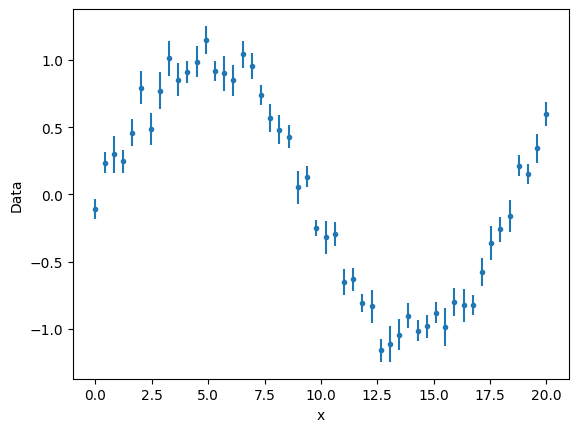

In [ ]:
def func(x,a):
    return np.sin(a*x)

np.random.seed(123)
x=np.linspace(0,20,50)

y=(np.sin(x/3)+np.random.normal(np.sin(x/3),0.2))/2
ery=[]
for i in range(len(x)):
    ery.append(np.random.normal(0.1,0.02))
plt.errorbar(x,y,ery,ls='', marker='.')
plt.xlabel("x")
plt.ylabel('Data')
plt.show()

In [ ]:
gmodel = Model(func)
result = gmodel.fit(y, x=x,a=1)

print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 119
    # data points      = 50
    # variables        = 1
    chi-square         = 46.8836357
    reduced chi-square = 0.95680889
    Akaike info crit   = -1.21771545
    Bayesian info crit = 0.69430756
    R-squared          = -0.79068686
[[Variables]]
    a:  1.04918825 +/- 0.01750715 (1.67%) (init = 1)


In [ ]:
def chi2Unc(x,y, ey, a):
    z=func(x,a)
    return sum(((y-z)/ey)**2)

av=np.linspace(0.1,4,100)

z=np.zeros(len(av))
for i in range(len(av)):
        a=av[i]
        z[i]=chi2Unc(x,y,ery,a)

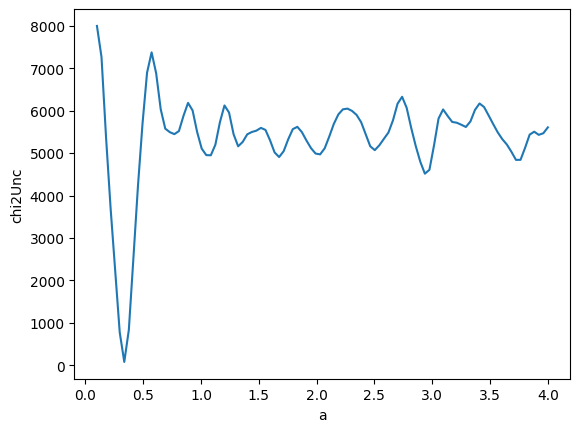

In [ ]:
plt.plot(av,z,'-')
plt.xlabel("a")
plt.ylabel('chi2Unc')
plt.show()

In [ ]:
eryrec=[]
for i in range(len(x)):
    eryrec.append(1/ery[i])

gmodel = Model(func)
result = gmodel.fit(y,a=1.2,x=x,weights=eryrec)
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 187
    # data points      = 50
    # variables        = 1
    chi-square         = 4930.62050
    reduced chi-square = 100.624908
    Akaike info crit   = 231.559856
    Bayesian info crit = 233.471879
    R-squared          = -187.321515
[[Variables]]
    a:  1.06787231 +/- 0.01640931 (1.54%) (init = 1.2)


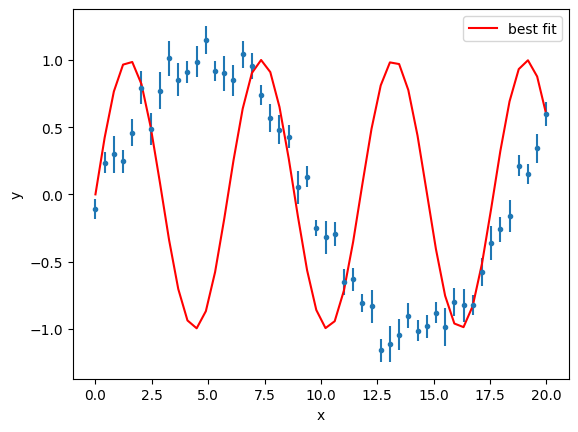

In [ ]:
plt.errorbar(x,y,ery,ls='', marker='.')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
gmodel = Model(func)
result = gmodel.fit(y,a=0.2,x=x,weights=eryrec)
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 50
    # variables        = 1
    chi-square         = 80.4941785
    reduced chi-square = 1.64273834
    Akaike info crit   = 25.8080930
    Bayesian info crit = 27.7201160
    R-squared          = -2.07441745
[[Variables]]
    a:  0.33612704 +/- 0.00183776 (0.55%) (init = 0.2)


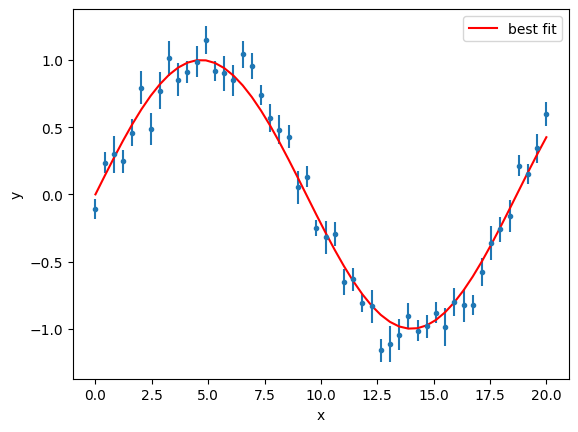

In [ ]:
plt.errorbar(x,y,ery,ls='', marker='.')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
k=len(x)-1
print("number of degrees of freedom=",k)

r1=np.sqrt(2*chi2Unc(x,y, ery, 1.41084859))/np.sqrt(2*k-1)
r2=np.sqrt(2*chi2Unc(x,y, ery, 0.33495704))/np.sqrt(2*k-1)

print(r1,r2)

number of degrees of freedom= 49
10.619600880257074 1.2938479735751012


# Residuals

Residuals are the difference between the fitted model and the data.

Residuals are important when determining the quality of a model. You can examine residuals in terms of their magnitude and/or whether they form a pattern.

We use the previous example. We take the best fit and we calculate the residuals

<ipython-input-156-8953996ccce5>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(x, residual, markerfmt=' ',use_line_collection=True)


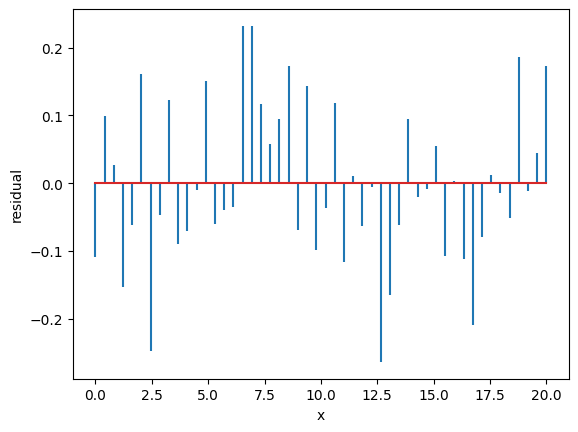

In [ ]:
residual=y- result.best_fit
#plt.plot(x, residual, 'bo', label='Residuals')
fig, ax = plt.subplots()
ax.stem(x, residual, markerfmt=' ',use_line_collection=True)
plt.xlabel("x")
plt.ylabel('residual')
plt.show()

<ipython-input-157-1a2f667b2998>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(x, residualUnc, markerfmt=' ',use_line_collection=True)


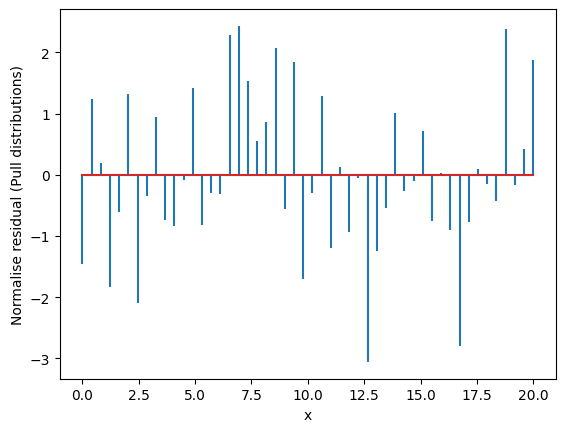

In [ ]:
residualUnc=(y- result.best_fit)/ery
#plt.plot(x, residual, 'bo', label='Residuals')
fig, ax = plt.subplots()
ax.stem(x, residualUnc, markerfmt=' ',use_line_collection=True)
plt.xlabel("x")
plt.ylabel("Normalise residual (Pull distributions)")
plt.show()

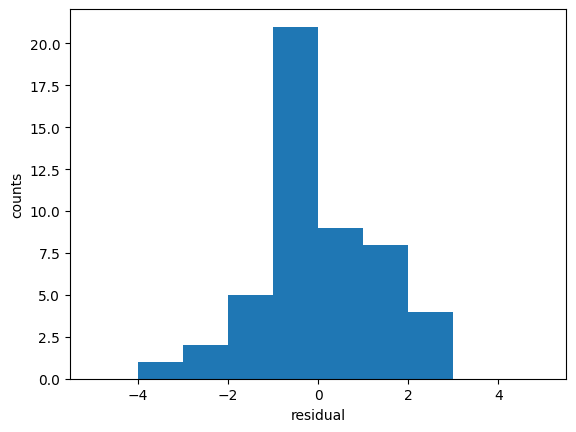

[ 0.  1.  2.  5. 21.  9.  8.  4.  0.  0.]


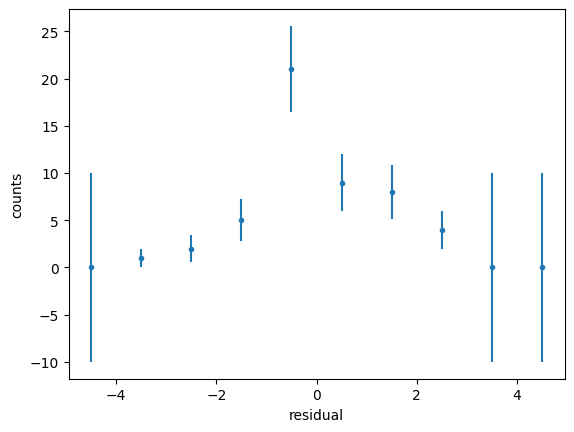

In [ ]:

counts, xbins, patches=plt.hist(residualUnc, bins = 10, range=(-5,5))
plt.xlabel("residual")
plt.ylabel('counts')
plt.show()
# One can get the bin content and xvalues from the hist -- This would be necessary when one
# might want to fit the histogram

print(counts)
errcounts=[]
for i in range(len(xbins)-1):
    if counts[i]>0:
        errcounts.append(np.sqrt(counts[i]))
    else:
        errcounts.append(10)
## Why do we do the above, i.e. setting zero values with large uncertainties?
xvals=[]
for i in range(len(xbins)-1): xvals.append((xbins[i]+xbins[i+1])/2)
plt.errorbar(xvals,counts,errcounts,ls='', marker='.')
plt.xlabel("residual")
plt.ylabel("counts")
plt.show()


The residuals should be Gaussianly distributed with mean=0 and std=1. Deviations from this indicate issues with underfitting/overfitting/problems with uncertainties.

Where the average residual is not 0, it implies that the model is systematically biased (i.e., consistently over- or under-predicting).

Where residuals contain patterns, it implies that the model is qualitatively wrong, as it is failing to explain some property of the data. The existence of patterns invalidates most statistical tests.

# Fitting Binned data: why a LSE might be biased here...

Lets consider an example of measuring the lifetime of a particle using a PDF $f(t;A, \tau)=A e^{t/\tau}$

In [ ]:
np.random.seed(32)

x=np.linspace(1,10,20)
y=np.linspace(0,0,20)
erry=[]
for i in range(len(x)):
    y[i]=np.random.poisson((13*np.exp(-x[i]/3)))
    if y[i]<0:
        y[i]=0
y=y.astype(int)
datax=[]
datay=[]
dataey=[]
eryrec=[]
for i in range(len(x)):
    if y[i]>0:
        datax.append(x[i])
        datay.append(y[i])
        dataey.append(np.sqrt(y[i]))
        eryrec.append(1.0/np.sqrt(y[i]))

In [ ]:
datax=np.array(datax)
datay=np.array(datay)
dataey=np.array(dataey)
eryrec=np.array(eryrec)

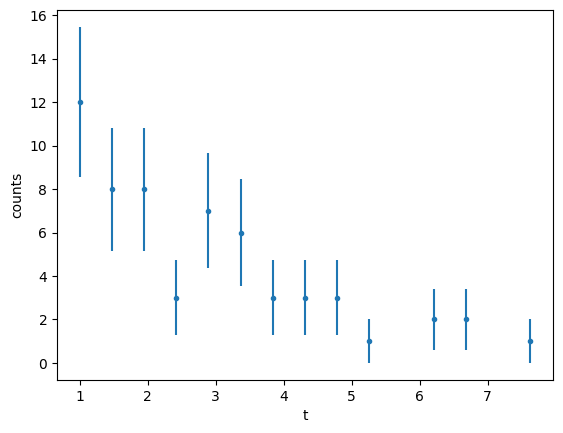

In [ ]:
# We generate noisy data on integer values of x to mimick the idea of bins and low-statistics...
plt.errorbar(datax, datay, dataey,ls='', marker='.')
# plt.plot(x,y,'o',label="data")
plt.xlabel("t")
plt.ylabel("counts")
plt.show()

Let's start as usual with the $\chi^2$ function exactly as we did before

In [ ]:
def func(x,a,b):
    return a*np.exp(b*x)


In [ ]:
gmodel = Model(func)
gmodel.nan_policy = 'propagate'
result = gmodel.fit(datay, x=datax, weights=eryrec, a=12, b=-0.3)

print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 13
    # variables        = 2
    chi-square         = 6.13305655
    reduced chi-square = 0.55755060
    Akaike info crit   = -5.76632943
    Bayesian info crit = -4.63643071
    R-squared          = 0.95464748
[[Variables]]
    a:  14.4149903 +/- 3.04980981 (21.16%) (init = 12)
    b: -0.38259409 +/- 0.06800722 (17.78%) (init = -0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.8743


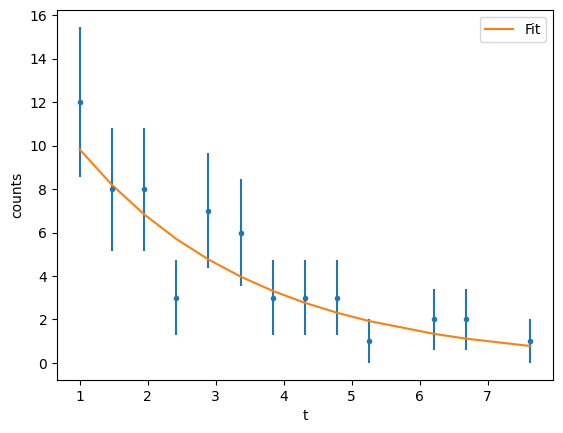

In [ ]:
plt.errorbar(datax, datay,dataey,ls='', marker='.')
plt.plot(datax,result.best_fit,'-',label="Fit")
plt.legend()
plt.xlabel("t")
plt.ylabel('counts')
plt.show()

At this stage we just want to plot the $\chi^2$ surface to see how it looks like. We can do a better analysis of the fit, but I leave it to you.

In [ ]:
def chi2(aaa, bbb):
    ll=0
    for i in range(len(datax)):
        ll+=((datay[i]-func(datax[i],aaa,bbb))**2)*eryrec[i]**2
       # print(datay[i])
    return ll

In [ ]:
Ax=np.linspace(0,16,500)
Bx=np.linspace(-0.7,-0.15,500)

Axgrid, Bxgrid = np.meshgrid(Ax, Bx)
Zgrid = chi2(Axgrid, Bxgrid)

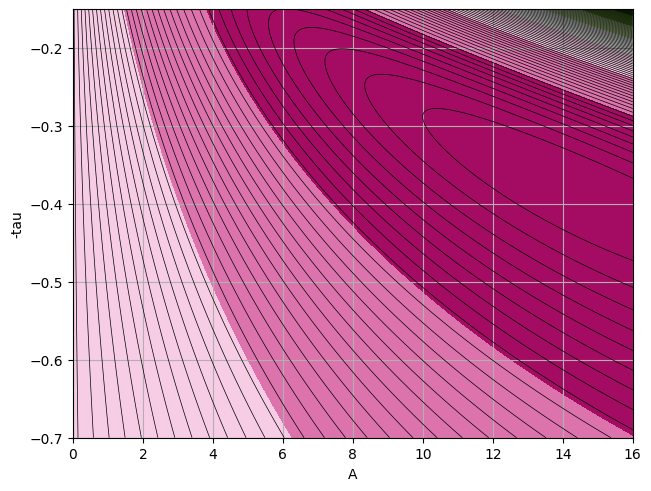

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Zgrid.min(), Zgrid.max())
cmap = plt.get_cmap('PiYG')
normB = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(Axgrid,Bxgrid, Zgrid,cmap=cmap,norm=normB)
CS = plt.contour(Axgrid,Bxgrid, Zgrid,100,linewidths=0.5,colors='k')

plt.ylabel('-tau')
plt.xlabel('A')
ax.grid()
plt.show()

We have used here the standard $\chi^2$ to perform the fit, but remeber this is based on the hypothesis that the underlying distribution is a Gaussian.
What happens if we change the underlying distribution? What if instead of a Gaussian we use a Poisson, since here we are dealing with binned data and low-statistics?

Let's now start again from the likelihood assuming a Poisson

\begin{eqnarray*}
{L}=\Pi_i P_{Poisson}(y_i,f(x_i|a))=\Pi_i \frac{f(x_i|a)^{y_i}}{y_i!}exp(-f(x_i|a))
\end{eqnarray*}

or after some maths

\begin{eqnarray*}
-2\ln L=2\sum_i (f(x_i|a)-y_i \ln f(x_i|a) +\ln y_i!)
\end{eqnarray*}

The term $+\ln y_i!$ does not depend on parameters so during minimisation we can forget it!

In [ ]:
def like(param):
    aaa,bbb = param
    ll=0
    for i in range(len(datax)):
        ll+=2*(func(datax[i],aaa,bbb)-datay[i]*np.log(func(datax[i],aaa,bbb)))
    return ll

In [ ]:
Ax=np.linspace(0,16,500)
Bx=np.linspace(-0.7,-0.15,500)

Axgrid, Bxgrid = np.meshgrid(Ax, Bx)
paramz=[Axgrid, Bxgrid]
Zgrid = like(paramz)

<ipython-input-168-d671226540f8>:5: RuntimeWarning: divide by zero encountered in log
  ll+=2*(func(datax[i],aaa,bbb)-datay[i]*np.log(func(datax[i],aaa,bbb)))


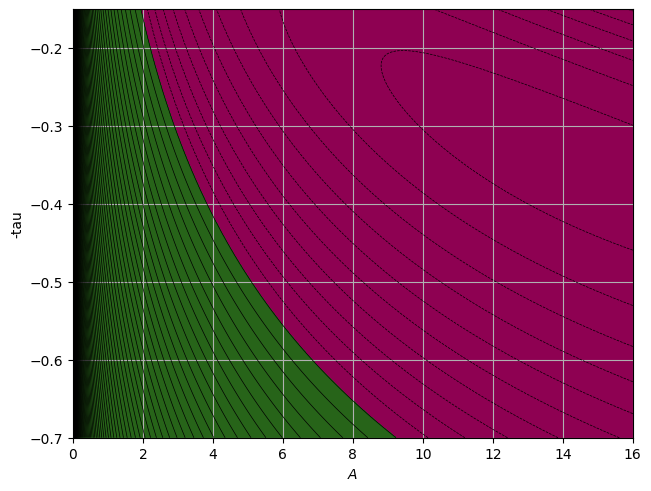

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Zgrid.min(), Zgrid.max())
cmap = plt.get_cmap('PiYG')
normB = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(Axgrid,Bxgrid, Zgrid,cmap=cmap,norm=normB)
CS = plt.contour(Axgrid,Bxgrid, Zgrid,100,linewidths=0.5,colors='k')

plt.ylabel('-tau')
plt.xlabel('$A$')
ax.grid()
plt.show()

In [ ]:
p0=[10,-0.3]
opt.fmin(like, p0, args=())


Optimization terminated successfully.
         Current function value: -83.946177
         Iterations: 43
         Function evaluations: 85


array([14.9318794, -0.3555406])

If you compare the results we get different values for A and $\tau$ when the underlying distribution is Gaussian or a Poisson.

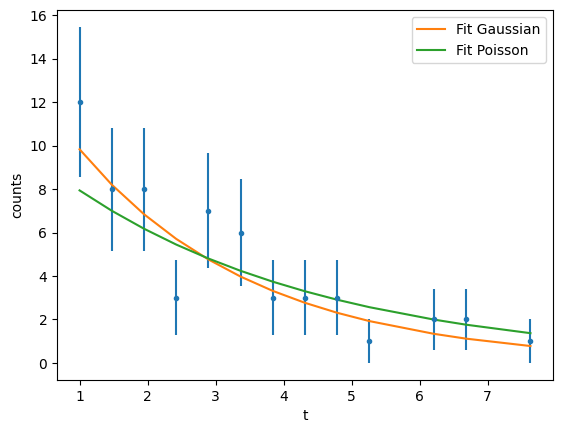

In [ ]:
plt.errorbar(datax, datay,dataey,ls='', marker='.')
plt.plot(datax,result.best_fit,'-',label="Fit Gaussian")
plt.plot(datax,func(datax,10.35008492,-0.26507234),'-',label="Fit Poisson")
plt.legend()
plt.xlabel("t")
plt.ylabel("counts")
plt.show()

We see that the fit both reproduce "reasonably" the data but depending on which underlying distribution you assume you may get very different  results!


# Worked out Example
The photoproduction of pions $\gamma p \to p \pi^0$ using linearly polarised photons is associated with a probability function: $$f(\phi;A,\Sigma)=A(1-\Sigma\cos(2\phi)),$$
where A encompasses the overall normalisation, and $\phi$ is the azimuthal distribution of the outgoing pion (the variable we measure in the laboratory), and takes values in the range from $-\pi$ to $\pi$. $\Sigma$ is the observable of interest that we are asked to determine from a data se of measurements of $\phi_i=[\phi_1,\phi_2,\phi_3,...,\phi_N]$

 (a) i. What are the three criteria we need to fulfill for the function above to be classified as a PDF? What is the value of A and the allaowed values of $\Sigma$ for these criteria to be met?

 (a) ii. Show that the MLE for $\Sigma$ is $$\hat{\Sigma}=-\frac{\sum_i^N\cos(2\phi_i)}{\sum_i^N\cos^2(2\phi_i)}$$ (Hint: You can assume that $\Sigma$ is small enough and apply the Taylor expansion $\frac{1}{1-x}=1+x$)

 (a) iii. Show that the MLE corresponds to a maximum point and show that the uncertainty of $\hat{\Sigma}$ is $$\sigma_\Sigma=\frac{1}{\sqrt{\sum_i^N\cos^2(2\phi_i)}}$$

 (b) i. Given the data in Sigma.dat (these correspond to different measurements of $\phi$ determine the $\hat{\Sigma}$ and its uncertainty using your answers from part (a).

 (b) ii. Plot the $\phi$ distribution of the data and discuss your choice of binning. Discuss the uncertainties associated with your yields (or counts) per bin and ensure these are illustrated in your plot.

 (b) iii. Determine $\Sigma$, its uncertainty, and the reduced $\chi^2$ using a least squares fit. Discuss the values you obtained.

 (b) iv. Plot the $\chi^2$ surface.

(a) i.

(a) ii.

(a) iii.


(b) i.

(b) ii.

(b) iii.

(b) iv.

## Extended Max Likelihood


"This differs from the standard method of maximum likelihood in that the normalisation of the probability distribution function is allowed to vary. It is thus applicable to problems in which the number of samples obtained is itself a relevant measurement. If the function is such that its size and shape can be independently varied, then the estimates given by the extended method are identical to the standard maximum likelihood estimators, though the errors require care of interpretation. If the function does not have this property, then extended maximum likelihood can give better results." Barlow https://doi.org/10.1016/0168-9002(90)91334-8

In conventional sampling theory an experiment usually consists of taking a predetermined number of samples.

In experimental physics, the collected number of events fluctuate following a Poisson distribution.

The number of events observed may be relevant to the quantities being estimated, and the incorporation of the
fact that the number observed has the actual value $\nu$ improves the estimates of the parameters $\hat{\theta}$. To account for this, we "extend" the maximum likelihood by relaxing the normalisation of the PDF:

The likelihood function: $$L=\prod_{i=1}^n f(x_i;\theta)$$ becomes $$L=Pois(n;\nu)\prod_{i=1}^n f(x_i;\theta)=\frac{\nu^n e^{-\nu}}{n!}\prod_{i=1}^n f(x_i;\theta)$$, where $n\sim Pois(n|\nu)$

### if $\nu$ is independent of $\theta$
Then the likelihood function becomes:
$$L=\frac{\nu^n e^{-\nu}}{n!}\prod_{i=1}^n f(x_i;\theta)\\
= \frac{e^{-\nu}}{n!}\prod_{i=1}^n \nu f(x_i;\theta),$$ and the Log likelihood
$$\ln L=-\nu - \ln n! +n\ln\nu+\sum_{i=1}^n \left(\ln f(x_i;\theta)\right).$$ The constant $\ln n!$ does not depend on our observables, so it wont affect the maximum position and can thus be neglected.

To find the estimator for $\nu$ we look for the minimum position in the negative loglikelihood:
$$\frac{\partial (-\ln L)}{\partial \nu}=1-\frac{n}{\nu}=0$$ which gives the maximum likelihood estimator $\hat{\nu}=n$. The estimator for $\theta$ results in the same estimator from our normal likelihood function
$$\frac{\partial (-\ln L)}{\partial \theta}=-\sum_{i=1}^n\frac{\partial f(x_i;\theta) }{\partial \theta}\frac{1}{f(x_i;\theta)}$$

### if $\nu$ is dependent of $\theta$
In the instance that $\nu$ is a function of $\theta$, $\nu(\theta)$, then
$$-\ln L=\nu(\theta)-\sum_{i=1}^n\ln\left(\nu(\theta)f(x_i;\theta)\right)$$ and the resultand estimators exploit information from both $n$ and $x$, which will look to smaller variations in $\hat{\theta}$.


### (trivial) Example
We are interested in determining the amount of events observed alongside with the characteristics of the PDF that describe our signal shape. Since the amount of signal collected follows a Poisson distribution, we can use the extended likelihood approach.

Lets first look at the data provided in ExtendedLLexample.txt:

Downloading...
From: https://drive.google.com/uc?id=1p3kLa9XZAZXiLIszq7SxMmoiNZ_qLYXf
To: /content/ExtendedLLexample.txt
100%|██████████| 3.94k/3.94k [00:00<00:00, 6.41MB/s]


Number of bins: 21  with bounds:  1.07311  and  1.14384


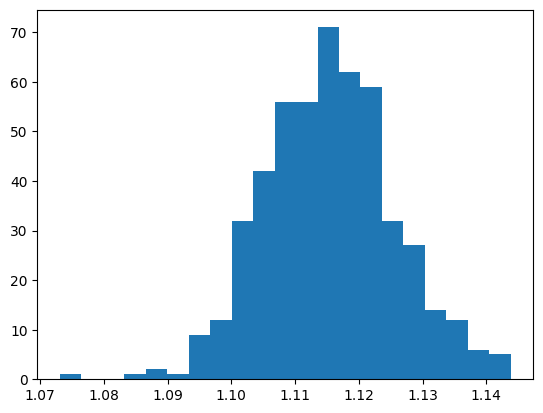

number of entries 500


In [ ]:
values = []
url = 'https://drive.google.com/uc?id=1p3kLa9XZAZXiLIszq7SxMmoiNZ_qLYXf'
output = 'ExtendedLLexample.txt'
gdown.download(url, output, quiet=False)
f = open(output)
for line in f.readlines():
    values.append(float(line))
f.close()

bins = int(math.sqrt(len(values)))-1
minim=min(values)
maxim=max(values)
print("Number of bins:" ,bins, " with bounds: ", minim, " and ", maxim)
binnedData, lowboundBin, patches=plt.hist(values, bins, range=(minim, maxim))
plt.show()
print("number of entries", len(values))


From this our Signal seems to be described by a Gaussian function.

Using the equation from the previous slide the negative log likelihood is the given by:
$$-\ln L=\nu(\theta)-\sum_{i=1}^n\ln\left(\nu(\theta)f(x_i;\theta)\right)$$


In [ ]:

def llog(params):
    ll = 0
    s,mu,sigma=params
    n=len(values)
    for i in values:
        ll += -np.log(s*norm.pdf(i, mu, sigma))
    ll=ll+s
    return ll

In [ ]:
x0=[2000,1.12, 0.01]
res=opt.minimize(llog,x0 )
print(res.x)


[5.00079486e+02 1.11537312e+00 1.01790519e-02]


Using the extended maximum likelihood we get that the number of signal events is 500.

In [ ]:
## We can plot the Gaussian function on top of our histogram. We need to scale the Gaussian function
## to our bin width to properly vizualise it.
x = np.linspace(1.05, 1.20, 1000)

def Gaus(x,params):
    s,mu,sigma=params
    Gausfun=s*norm.pdf(x, mu, sigma)
    return Gausfun*(1.2-1.05)/50


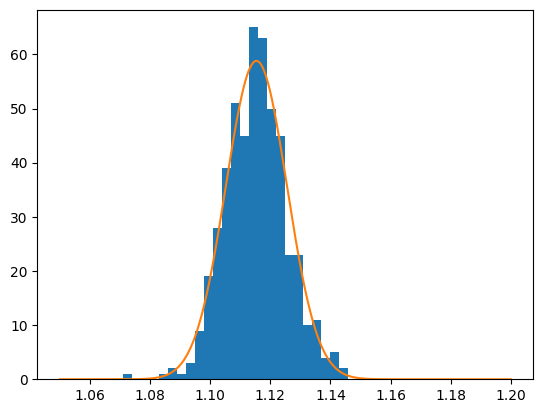

In [ ]:
params=res.x
plt.hist(values, 50, range=(1.05, 1.2))
plt.plot(x,Gaus(x,params),'-',label="Fit Poisson")
plt.show()


This was a trivial example since one can also get the number of events from the entries. However, this approach can be very useful when we are dealing with signal and background contributions. In this case, we can use a two component fit, with a PDF that describes the background and a PDF that described our signal:

Normalised PDF:
$$f(x;r,\vec{\theta})=rf_s(\vec{\theta})+(1-r)f_b(\vec{\theta}),$$
where $r=\frac{s}{s+b}$ is the ratio of signal to total. The prediction of the total number of events also follows a Poisson distribution with $\nu=s+b$. From this we can write the negative log likelihood:

$$-LL=s+b-n\ln(s+b)-\sum_i^n\ln(f(x;r,\vec{\theta})).$$

The extended ML method provides reliable values for obtained signal and background events and their corresponding uncertainties (Poisson fluctuations and uncertainty in proportion of signal to background)

<img src="http://drive.google.com/uc?export=view&id=1SYJx_xhAyhGryDeYsiVIcYYkflprpW4P" style="width:450px; transform: rotate(0deg)" >

Alternatively, one can also fit the normalised PDF:
$$f(x;r,\vec{\theta})=rf_s(\vec{\theta})+(1-r)f_b(\vec{\theta}),$$ and estimate the signal events by $s=r\cdot n$. This however, does not provide us with reliable determination of uncertainties as $\sigma_r\cdot n$ is not a good estimated of the variation of signal events as it ignores fluctuations in n.



#### Extended ML method is very useful when the determination of yield is needed -- for example determination of cross section


#### Cross section describes  the probability that two particles will collide and interact in a certain way, or for a specific reaction to occur. For example, the Rutherford cross-section is a measure of probability that an alpha particle will be deflected by a given angle during an interaction with an atomic nucleus.

#### When a cross section is specified as the differential limit of a function of some final-state variable, such as particle angle or energy, it is called a differential cross section. When a cross section is integrated over all scattering angles (and possibly other variables), it is called a total cross section or integrated total cross section


The probability that a reaction takes places can be written as:
$$\sigma=\frac{Y}{L},$$
where $Y$ denotes the Yield of produced events and $L$ denotes the luminosity.


The luminosity $L$ is a measure of the colliding frequency between beam and target, and thus accounts for characteristics of the initial state of the reaction. Specifically, (for a fixed target experiments) the luminosity is proportional to the number of target centers and the incident number of beam particles. Lets take as an example the photoproduction of single pions $\gamma p \to p \pi^0$. Here the luminosity is:

$$L=\frac{\Phi \rho l N_A}{A_r},$$ where $\Phi$ is the number of photons incident on the target, $\rho$ is the target density, $l$ is the target length, $A_r$ is the atomic weight of the target, and $N_A$ is Avocadrons number.

(Note: Things can get more complicated in collider experiments. See https://cds.cern.ch/record/941318/files/p361.pdf for a summary on luminosity determination).


The yield of produced events $Y$ can be determined in experiments by identifying the final state particles of the reaction (using for example detectors). In this approach, one needs to acount for limitations in the detector acceptance (detector blind spots) and detector efficiency:
$$Y=\frac{Y_{det}}{A\times \epsilon}$$, where $Y_{det}$ is the number of events for our reaction of interest that were detected in our system, $A$ is the detector acceptance, and $epsilon$ is the detector efficiency. The denominator, here which is a correction factor for the detected yields can be established using sophistigated Monte Carlo approaches, and realistic detector simulations. This approach also allows us to account for inefficiencies
in our analysis resulting in lost events in addition to detector inneficiencies.
